In [1]:
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
def f(x):
    return 7.2-3.1*x+4.3*x**3

def generate_dataset(n: int, a=-3, b=8, m = 0, sigma = 150):
    x = np.linspace(a, b, n)
    y = f(x) + np.random.normal(m, sigma, n)
    return train_test_split(x, y, test_size=0.2)

def fit_polynomial(degree: int, x_train, y_train, x_test, y_test):
    model = linear_model.LinearRegression()
    # add polynomial features
    new_x_train = PolynomialFeatures(degree= degree).fit_transform(x_train.reshape(-1,1))
    # fit the model
    model.fit(new_x_train, y_train)
    # make predictions for the train and test sets
    y_hat_train = model.predict(new_x_train)
    new_x_test = PolynomialFeatures(degree= degree).fit_transform(x_test.reshape(-1,1))
    y_hat_test = model.predict(new_x_test)

    return y_hat_train, y_hat_test

def plot_one(x_train, x_test, y_train, y_test, y_hat_train, y_hat_test):
    plt.scatter(x_train, y_train, s = 5, c = 'r')
    plt.scatter(x_test, y_test, s = 5, c = 'b')
    plt.scatter(x_train, y_hat_train, c = 'r', marker = 'x')
    plt.scatter(x_test, y_hat_test, c = 'b', marker = 'x')
    plt.show()

def get_errors(y_train, y_hat_train, y_test, y_hat_test):
    error_train = metrics.mean_squared_error(y_train, y_hat_train)
    error_test = metrics.mean_squared_error(y_test, y_hat_test)

    return error_train, error_test

# 1) Number of points vs Error for fixed model complexity

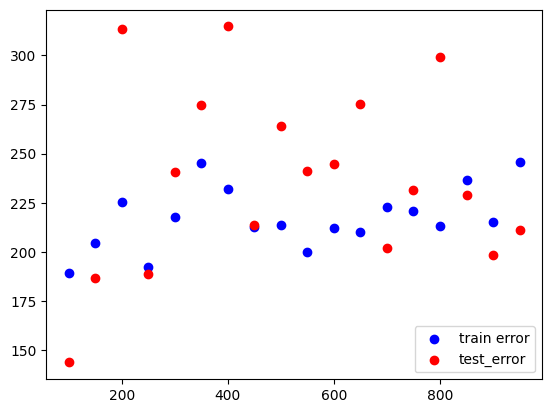

In [3]:
def plot_errors(n_points, repeat = 100):
    train_errors = []
    test_errors = []

    for n in n_points:
        error_train_sum, error_test_sum = 0, 0
        for repeat_for_given_n in range(repeat):
            x_train, x_test, y_train, y_test = generate_dataset(n)
            #print(x_train, y_train, x_test, y_test)
            y_hat_train, y_hat_test = fit_polynomial(5, x_train, y_train, x_test, y_test)
            # plot_one(x_train, x_test, y_train, y_test, y_hat_train, y_hat_test)
            error_train, error_test = get_errors(y_train, y_hat_train, y_test, y_hat_test)
            error_train_sum+=error_train
            error_test_sum+=error_test
        train_errors.append(error_train/repeat)
        test_errors.append(error_test/repeat)
    
    plt.scatter( n_points, train_errors, label = 'train error', c='b')
    plt.scatter(n_points, test_errors,  label = 'test_error', c= 'r')
    plt.legend()
    plt.show()

n_points = np.arange(100, 1000, 50)
plot_errors(n_points)

# 2) Model complexity vs Error for fixed number of points

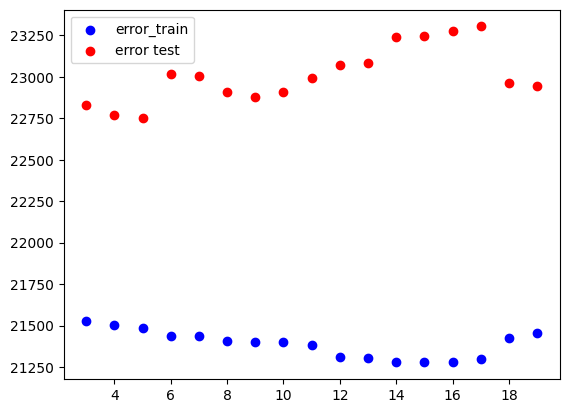

In [5]:
x_train, x_test, y_train, y_test = generate_dataset(n = 1000)
degrees = np.arange(3,20)
errors_train = []
errors_test = []
for d in degrees:
    y_hat_train, y_hat_test = fit_polynomial(degree= d, x_train=x_train, y_train=y_train, x_test=x_test, y_test = y_test)
    error_train, error_test = get_errors(y_train, y_hat_train, y_test, y_hat_test)
    errors_train.append(error_train)
    errors_test.append(error_test)

plt.scatter(degrees, errors_train, c='b', label = 'error_train')
plt.scatter(degrees, errors_test, c='r', label = 'error test')
# plt.yscale('log')
plt.legend()
plt.show()